In [157]:
using Images
using FileIO
using ImageShow
using LightXML
using Glob

In [249]:
function getCoords(fileName)
    xml = parse_file(fileName)
    xroot = root(xml)
    ces = xroot["table"]
    out = []
    for i in 1:length(ces)
        t=find_element(ces[i], "Coords")
        p = attribute(t,"points")
        a = [split(i," ") for i in split(p,",")]
        c = collect(Iterators.flatten(a))
        toInt = [parse(Int,num) for num in c]
        xs=[toInt[2+(n-1)*2] for n in 1:4]
        ys=[toInt[1+(n-1)*2] for n in 1:4]
        xmin = minimum(xs)
        xmax = maximum(xs)
        ymin = minimum(ys)
        ymax = maximum(ys)
        coords = [xmin,xmax,ymin,ymax]
        append!(out,coords)
    end
    return reshape(out,(4,length(ces)))
end

getCoords (generic function with 1 method)

In [266]:
function createMask(filename)
    coords = getCoords(filename)
    img = load(replace(filename,".xml"=>".png"))
    mask = zeros(size(img))
    for i in 1:size(coords)[2]
        mask[coords[1,i]:coords[2,i],coords[3,i]:coords[4,i]] .= 1;
    end
    return mask
end

createMask (generic function with 1 method)

In [261]:
m = createMask("./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10569.xml")
save("test.png",m)

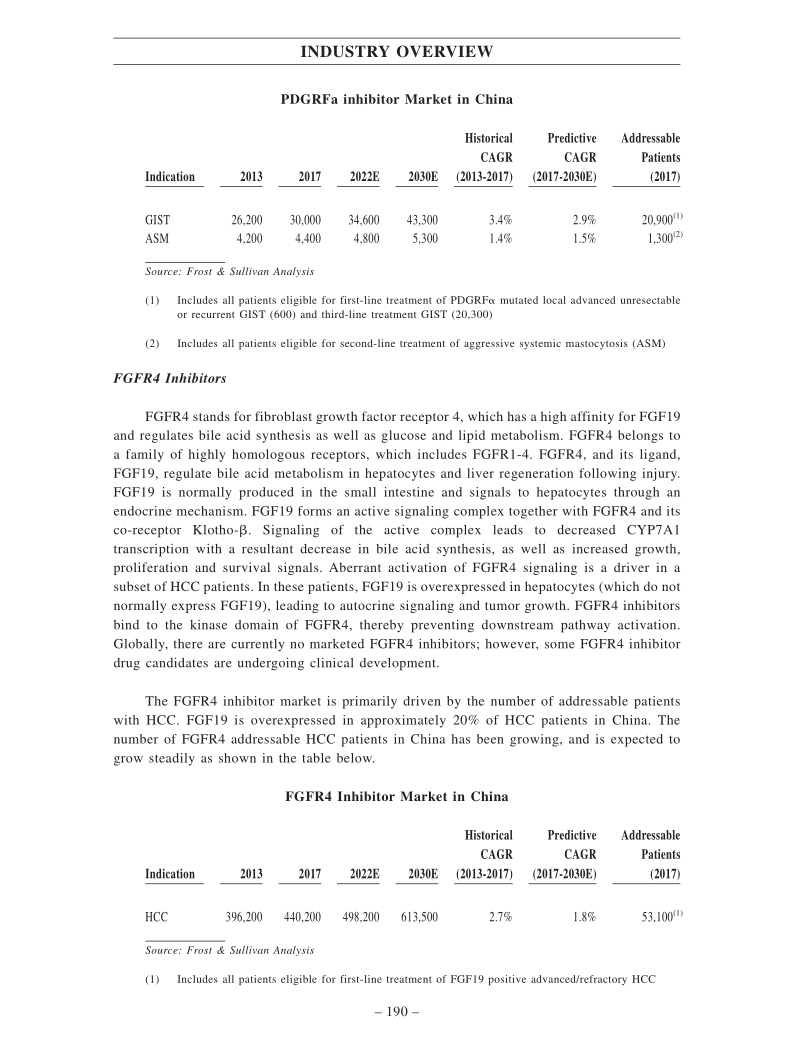

In [119]:
img = load("./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10569.jpg")

In [267]:
# Get all xml files in directory
fnames = glob("*.xml","./ICDAR2019_cTDaR/training/TRACKA/ground_truth/")

1200-element Array{String,1}:
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00000.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00001.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00002.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00003.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00004.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00005.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00006.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00007.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00008.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00009.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00010.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00018.xml"
 "./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00019.xml"
 ⋮                                                                
 "./ICDAR2019_cTDaR/training/TRA

In [268]:
for f in fnames
    filename = replace(f,".xml"=>"_mask.png")
    try
        m = createMask(f)
        save(filename,m)
    catch 
        println(filename)
    end
end

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00000_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00001_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00002_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00003_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00004_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00005_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00006_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00007_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00008_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00009_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00010_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00018_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00019_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00020_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00128_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00129_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00130_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00131_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00132_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00133_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00134_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00135_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00136_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00137_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00138_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00139_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00140_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00141_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00199_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00200_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00201_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00202_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00203_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00204_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00205_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00206_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00207_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00208_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00209_mask.png


┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00233_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00235_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00239_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00241_mask.png


┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00254_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00255_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00256_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00257_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00258_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00259_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00260_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00261_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00262_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00263_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00264_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00265_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00266_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00267_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00395_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00396_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00397_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00398_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00403_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00404_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00405_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00406_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00407_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00408_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00409_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00410_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00411_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00412_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00502_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00503_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00504_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00505_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00506_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00507_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00508_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00509_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00510_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00511_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00512_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00513_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00514_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00515_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00597_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00598_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00599_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00600_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00601_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00602_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00603_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00604_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00605_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00606_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00607_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00608_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00609_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00610_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00805_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00806_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00807_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00808_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00809_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00815_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00816_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00817_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00818_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00819_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00820_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00821_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00822_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00823_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00919_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00920_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00921_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00922_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00923_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00924_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00925_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00926_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00927_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00928_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00929_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t00930_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10000_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10001_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10078_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10079_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10080_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10081_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10082_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10083_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10084_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10085_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10086_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10087_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10088_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10089_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10090_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10091_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10172_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10173_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10174_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10175_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10176_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10177_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10178_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10179_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10180_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10181_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10182_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10183_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10184_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10185_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10258_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10259_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10260_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10261_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10262_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10263_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10264_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10265_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10266_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10267_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10268_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10269_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10270_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10271_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10332_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10333_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10334_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10335_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10336_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10337_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10338_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10339_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10340_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10341_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10342_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10343_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10344_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10345_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10421_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10422_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10423_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10424_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10425_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10426_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10427_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10428_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10429_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10430_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10431_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10432_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10433_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10434_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10510_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10511_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10512_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10513_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10514_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10515_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10516_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10517_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10518_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10519_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10520_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10521_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10522_mask.png
./ICDAR2019_cTDaR/training/TRACKA/ground_truth/cTDaR_t10523_mask.png
./ICDAR2019_cTDaR/training/TRACKA/

┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47
┌ Warning: QuartzImageIO created no image source
└ @ QuartzImageIO /Users/leytzher/.julia/packages/QuartzImageIO/AjiIs/src/QuartzImageIO.jl:47

In [ ]:
fnames = glob("*.xml","./ICDAR2019_cTDaR/training/TRACKA/ground_truth/")